#Main program

In [58]:
from sklearn.datasets import load_digits
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


In [49]:
#loading digit dataset
dataset = load_digits()

<Figure size 640x480 with 0 Axes>

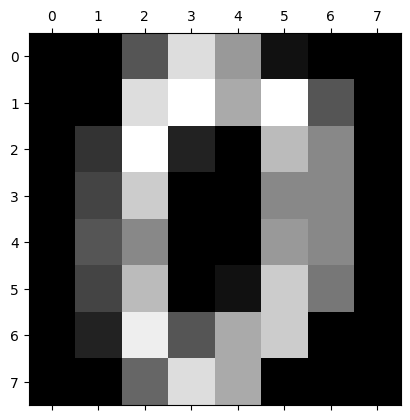

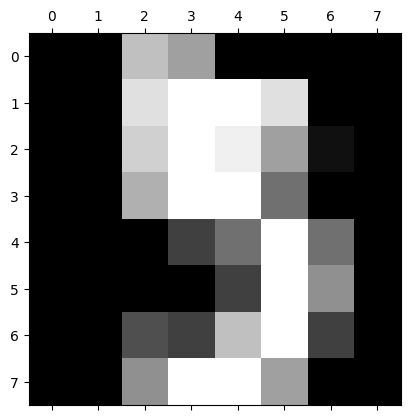

In [50]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8)) # matrix show -- can change 0 to 1,2,3,4...etc
plt.matshow(dataset.data[5].reshape(8,8))

In [51]:
df = pd.DataFrame(dataset.data)

In [52]:
X = df
y = dataset.target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # values scaled like -1 to 1
X_scaled = scaler.fit_transform(X)

In [53]:
print("Models accuracy by considering all features by 211P043:")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=30)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


Models accuracy by considering all features by 211P043:


0.9722222222222222

In [54]:
#Applying PCA for columns reduction
from sklearn.decomposition import PCA
pca = PCA(0.95) # retain 95% features
X_pca = pca.fit_transform(X)

In [55]:
print("Models accuracy by considering 29 important features by 211P043:")
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2,
random_state=30)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

Models accuracy by considering 29 important features by 211P043:


0.9694444444444444

In [56]:
#selecting only two columns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [57]:
print("Models accuracy by considering only 2 features features")
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2,
random_state=30)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

Models accuracy by considering only 2 features features


0.6083333333333333

#post lab


In [59]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
# Load Iris dataset
dataset = load_iris()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [64]:
# Convert to DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
# Features and Target
X = df
y = dataset.target
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=30)
# Model Training with All Features
print("Model accuracy using all features by 211P043:")
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
print(f"Accuracy: {model.score(X_test, y_test):.4f}\n\n")
# PCA to retain 95% variance
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Shape: {X_pca.shape}") # Reduced number of features
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Number of components: {pca.n_components_}")
# Train/Test Split for PCA-reduced data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2,
random_state=30)
# Model Training with PCA-reduced features
print("Model accuracy using 95% variance retained features by 211P043:")
model.fit(X_train_pca, y_train)
print(f"Accuracy: {model.score(X_test_pca, y_test):.4f}\n\n")
# PCA with only 1 components
pca = PCA(n_components=1)
X_pca_1 = pca.fit_transform(X_scaled)
print(f"PCA Shape (1 components): {X_pca_1.shape}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
# Train/Test Split for 1-component PCA data
X_train_pca_1, X_test_pca_1, y_train, y_test = train_test_split(X_pca_1, y, test_size=0.2,
random_state=30)
# Model Training with 1-component PCA features
print("Model accuracy using only 1 components by 211P043:")
model.fit(X_train_pca_1, y_train)
print(f"Accuracy: {model.score(X_test_pca_1, y_test):.4f}")

Model accuracy using all features by 211P043:
Accuracy: 0.9333


PCA Shape: (150, 2)
Explained Variance Ratio: [0.72962445 0.22850762]
Number of components: 2
Model accuracy using 95% variance retained features by 211P043:
Accuracy: 0.9333


PCA Shape (1 components): (150, 1)
Explained Variance Ratio: [0.72962445]
Model accuracy using only 1 components by 211P043:
Accuracy: 0.9667
